In [1]:
import networkx as nx
G = nx.Graph()

## Nodes
Graph $G$ can be grown in several ways. 
* Graph generator functions
* Facilities to read and write graphs in many formats 

In [2]:
G.add_node(1) # One node at a time
G.add_nodes_from([2, 3]) # Add nodes from an iterable container (e.g. list)

In [3]:
# Can also add nodes along with node attributes of the form (node, node_attribute_dict)
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"})
])

In [4]:
# Nodes from one graph can be incorporated into another.
H = nx.path_graph(10)
G.add_nodes_from(H)
# Now G contains nodes of H as nodes of G. 

In [6]:
# Can also use the graph H as a node in G
G.add_node(H)
# The above allows for having graph of graphs

## Edges
$G$ can also be grown by adding one edge at a time

In [7]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e) # unpack edge tuple*

by adding a list of edges

In [8]:
G.add_edges_from([(1,2), (1,3)])

or by adding any 'ebunch' of edges. 
* An 'ebunch' is any iterable container of edge touples

In [9]:
G.add_edges_from(H.edges)

In [10]:
G.clear() # Removes all nodes and edges

In [11]:
#We add new nodes/edges and NetworkX quietly ignores any that are already present.
G.add_edges_from([(1,2), (1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3, 'm')

At this stage the graph $G$ consists of 8 nodes and 3 edges, as can be seen by:

In [14]:
print("Number of nodes in G: " + str(G.number_of_nodes()))
print("Number of edges in G: " + str(G.number_of_edges()))

Number of nodes in G: 8
Number of edges in G: 3


In [15]:
DG = nx.DiGraph()
DG.add_edge(2,1)
DG.add_edge(1,3)
DG.add_edge(2,4)
DG.add_edge(1,2)
assert list(DG.successors(2)) == [1,4]
assert list(DG.edges) == [(2,1), (2,4), (1,3), (1,2)]

## Examining elements of a graph
* $\texttt{G.nodes}$ - set view of nodes of graph
* $\texttt{G.edges}$ - set view of edges of graph
* $\texttt{G.adj}$ - set view of neighbors of nodes
* $\texttt{G.degree}$ - set view of degrees of nodes

In [19]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1])) # Neighbors of node 1
print(G.degree[1]) # Degree of node 1

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


## Removing elements from a graph
Can remove nodes and edges from the graph in a similar fashion to adding
* $\texttt{Graph.remove\_node()}$
* $\texttt{Graph.remove\_nodes\_from()}$
* $\texttt{Graph.remove\_edge()}$
* $\texttt{Graph.remove\_edges\_from()}$

In [20]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1,3)

[1, 3, 'spam']


## Drawing Graphs
Basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included.

In [25]:
import matplotlib.pyplot as plt

AttributeError: module 'scipy.sparse' has no attribute 'lil_array'

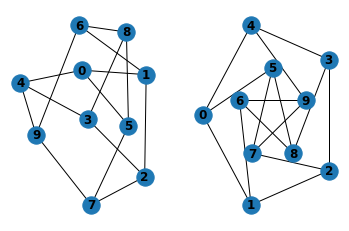

In [29]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5,10), range(5)], with_labels=True, font_weight='bold')
print(nx.incidence_matrix(G))